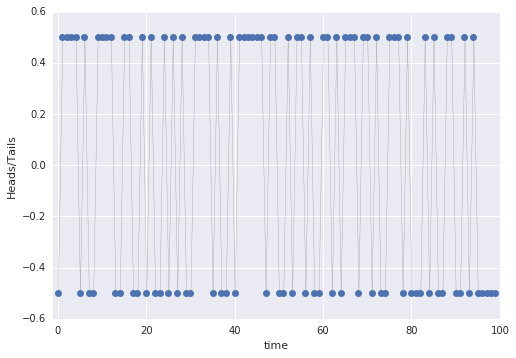

In [1]:
import seaborn as sns
import random

samples = [ (random.randint(0, 1)-0.5) for i in range(100) ]
ax = sns.tsplot(samples, value="Heads/Tails", interpolate=False)
ax.set_xlabel("time");

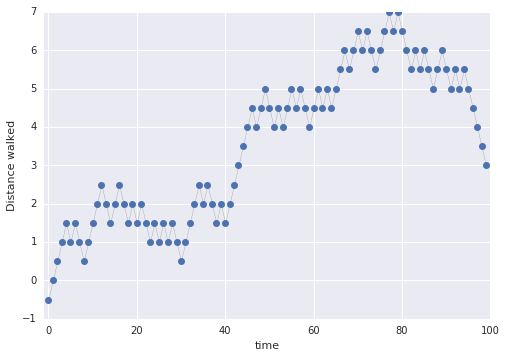

In [2]:
# cumulative
import numpy as np
sums = np.cumsum(samples)
ax = sns.tsplot(sums, value="Distance walked", interpolate=False)
ax.set_xlabel("time");

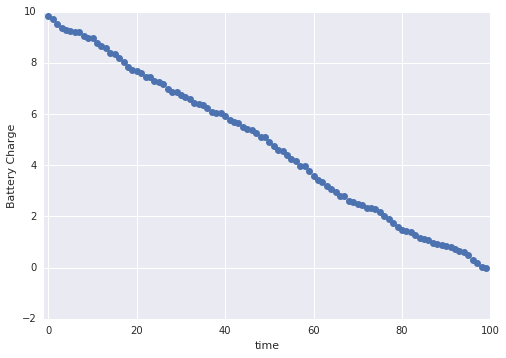

In [10]:
charge = 10 + np.cumsum([ (-0.2*random.random()) for i in range(100) ])
ax = sns.tsplot(charge, value="Battery Charge", interpolate=False)
ax.set_xlabel("time");

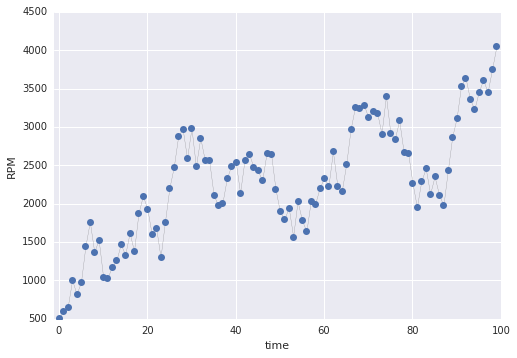

In [15]:
rpm = 1000 * (1 + np.cumsum([ (random.random()-0.5) for i in range(100) ]))
ax = sns.tsplot(charge, value="RPM", interpolate=False)
ax.set_xlabel("time");

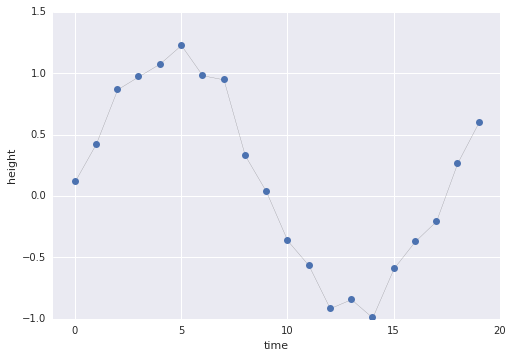

In [31]:
import seaborn as sns

def create_time_series(SEQ_LEN=20):
  freq = (np.random.random()*0.5) + 0.1  # 0.1 to 0.6
  ampl = np.random.random() + 0.5  # 0.5 to 1.5
  noise = [np.random.random()*0.3 for i in xrange(SEQ_LEN)] # -0.3 to +0.3 uniformly distributed
  x = np.sin(np.arange(0,SEQ_LEN) * freq) * ampl + noise
  return x

ax = sns.tsplot( create_time_series() , value = "height", interpolate=False);
ax.set_xlabel("time");

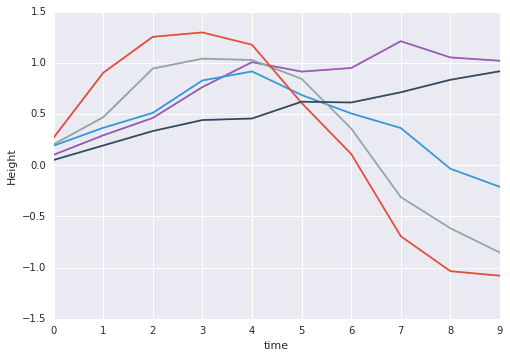

In [38]:
import numpy as np
import seaborn as sns

SEQ_LEN = 10

def create_time_series():
  freq = (np.random.random()*0.5) + 0.1  # 0.1 to 0.6
  ampl = np.random.random() + 0.5  # 0.5 to 1.5
  noise = [np.random.random()*0.3 for i in xrange(SEQ_LEN)] # -0.3 to +0.3 uniformly distributed
  x = np.sin(np.arange(0,SEQ_LEN) * freq) * ampl + noise
  return x

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
for i in xrange(0, 5):
  ax = sns.tsplot( create_time_series(), color=flatui[i%len(flatui)], value="Height");  # 5 series
  ax.set_xlabel("time")

In [41]:
def to_csv(filename, N):
  with open(filename, 'w') as ofp:
    for lineno in xrange(0, N):
      seq = create_time_series()
      seq = np.round(seq, 2)
      line = ",".join(map(str, seq))
      ofp.write(line + '\n')

import os
try:
  os.makedirs('data/sines/')
except OSError:
  pass
to_csv('train.csv', 10)  # 1000 sequences

In [42]:
!cat train.csv

0.13,0.52,0.76,0.71,0.63,0.29,0.15,-0.23,-0.34,-0.38
0.27,0.32,0.63,0.63,0.8,0.75,0.63,0.23,0.18,-0.23
0.3,0.49,0.87,1.08,1.17,1.25,1.46,1.52,1.65,1.46
0.29,0.61,1.16,1.06,0.92,0.53,0.04,-0.38,-0.82,-0.63
0.26,0.43,0.67,0.89,0.7,0.65,0.06,-0.2,-0.57,-0.57
0.06,0.6,0.99,1.19,1.0,0.58,0.05,-0.46,-0.87,-0.69
0.06,0.44,0.66,0.68,0.47,0.53,0.15,-0.07,-0.33,-0.3
0.26,0.53,0.96,1.21,1.33,1.63,1.36,1.13,0.71,0.2
0.3,0.42,0.65,0.53,0.72,0.83,0.97,0.91,0.94,0.82
0.17,0.17,0.43,0.62,0.82,0.78,0.86,0.83,1.01,0.85


In [51]:
def create_time_series(SEQ_LEN=20):
  freq = (np.random.random()*0.5) + 0.1  # 0.1 to 0.6
  ampl = np.random.random() + 0.5  # 0.5 to 1.5
  noise = [np.random.random()*0.3 for i in xrange(SEQ_LEN)] # -0.3 to +0.3 uniformly distributed
  x = np.sin(np.arange(0,SEQ_LEN) * freq) * ampl + noise
  return x

orig = create_time_series()
orig[SEQ_LEN/3] -= 2.3

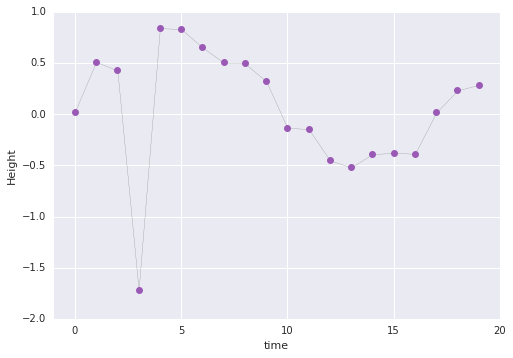

In [54]:
ax = sns.tsplot( orig, color=flatui[0], value="Height", interpolate=False);
ax.set_xlabel("time")

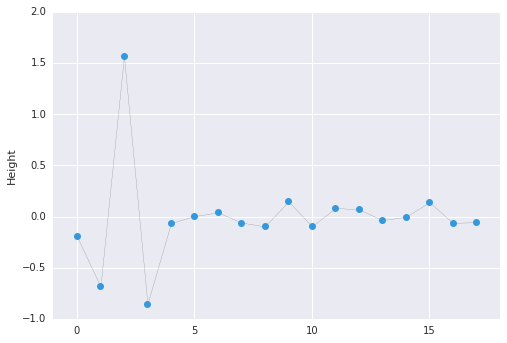

In [55]:
fil1 = np.convolve(orig, [0.33, -0.67, 0.33], mode="valid")
ax = sns.tsplot( fil1, color=flatui[1], value="Height", interpolate=False);

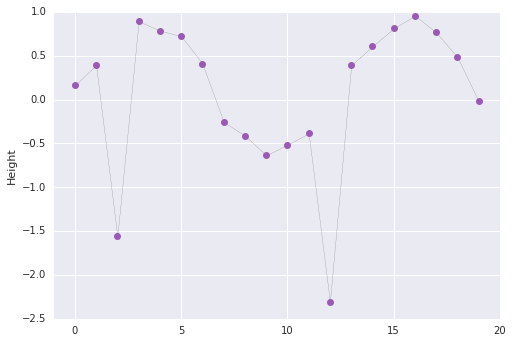

In [80]:
x = create_time_series()
x[2] -= 2.3
x[12] -= 2.3
ax = sns.tsplot( x, color=flatui[0], value="Height", interpolate=False);